1. Import necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import talib


2. Read data and print few lines

In [24]:
data = pd.read_csv("../Data/yfinance_data/AAPL_historical_data.csv")
data.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


3. Calculate moving averages

In [25]:
# Calculate Simple Moving Average (SMA) for 50 and 200 periods
data['SMA_50'] = talib.SMA(data['Close'], timeperiod=50)
data['SMA_200'] = talib.SMA(data['Close'], timeperiod=200)



4. Calculate RSI

In [27]:
# Calculate Relative Strength Index (RSI) for 14 periods
data['RSI'] = talib.RSI(data['Close'], timeperiod=14)


5. Calculate MACD

In [28]:
# Calculate Moving Average Convergence Divergence (MACD)
macd, macdsignal, macdhist = talib.MACD(data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
data['MACD'] = macd
data['MACD_Signal'] = macdsignal
data['MACD_Hist'] = macdhist


6. View updated data

In [29]:
print(data.head())


         Date      Open      High       Low     Close  Adj Close     Volume  \
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits  SMA_50  SMA_200  RSI  MACD  MACD_Signal  MACD_Hist  
0        0.0           0.0     NaN      NaN  NaN   NaN          NaN        NaN  
1        0.0           0.0     NaN      NaN  NaN   NaN          NaN        NaN  
2        0.0           0.0     NaN      NaN  NaN   NaN          NaN        NaN  
3        0.0           0.0     NaN      NaN  NaN   NaN          NaN        NaN  
4        0.0           0.0     NaN      NaN  NaN   NaN          NaN        NaN  


7. Visualize 

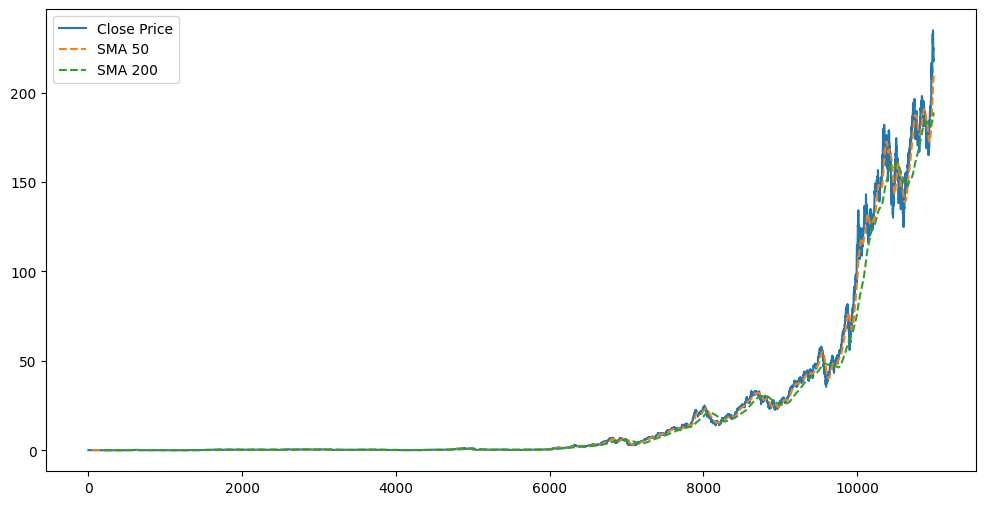

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['SMA_50'], label='SMA 50', linestyle='--')
plt.plot(data['SMA_200'], label='SMA 200', linestyle='--')
plt.legend()
plt.show()


8. Manual Calculation for Financial Metrics

In [37]:
import pandas as pd

# Load your data
data = pd.read_csv("../Data/yfinance_data/AAPL_historical_data.csv")
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Calculate SMA
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# Calculate RSI
delta = data['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
data['RSI'] = 100 - (100 / (1 + rs))

# Calculate MACD
exp12 = data['Close'].ewm(span=12, adjust=False).mean()
exp26 = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = exp12 - exp26
data['MACD_Signal'] = data['MACD'].ewm(span=9, adjust=False).mean()
data['MACD_Hist'] = data['MACD'] - data['MACD_Signal']

print(data.head())



                Open      High       Low     Close  Adj Close     Volume  \
Date                                                                       
1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

            Dividends  Stock Splits  SMA_50  SMA_200  RSI      MACD  \
Date                                                                  
1980-12-12        0.0           0.0     NaN      NaN  NaN  0.000000   
1980-12-15        0.0           0.0     NaN      NaN  NaN -0.000534   
1980-12-16        0.0           0.0     NaN      NaN  NaN -0.001659   
1980-12-17        0.0           0.0     NaN      NaN  NaN -0.002299   
1980-12-18        0.0           0.0     N

10. Visualiza manual calculation

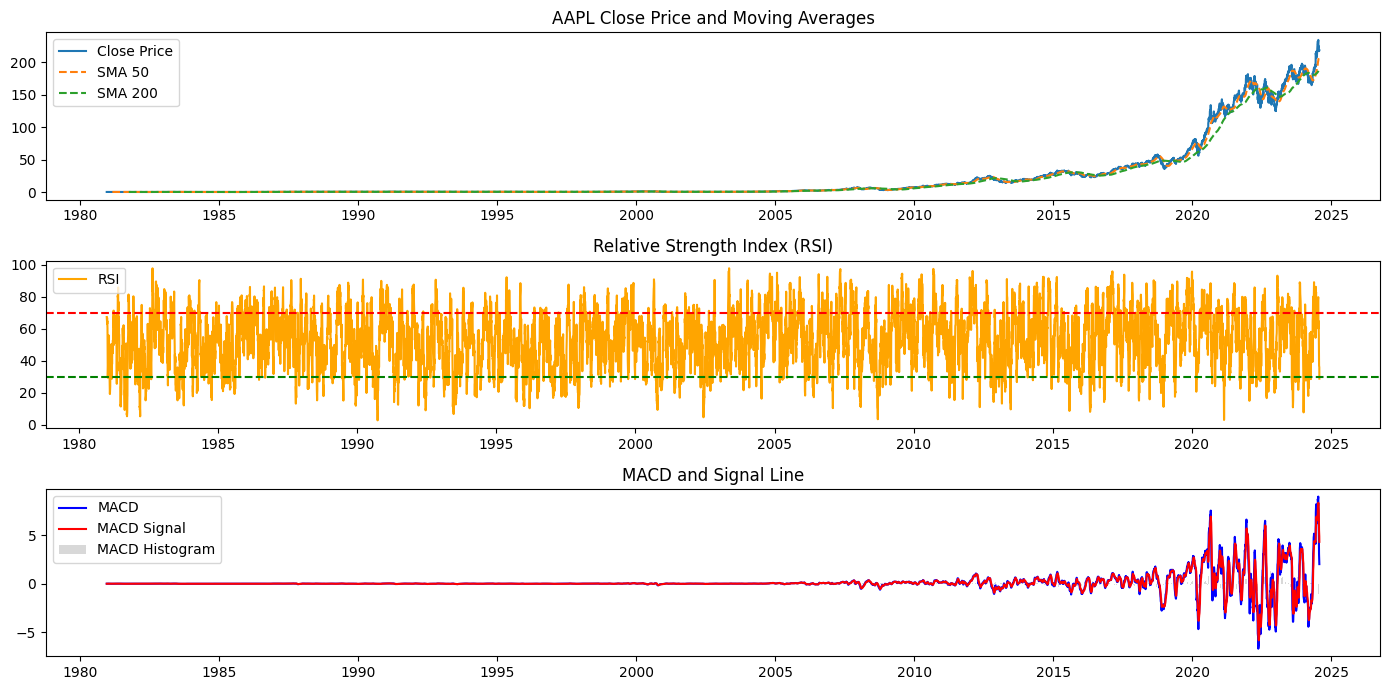

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and preprocess your data
data = pd.read_csv("../Data/yfinance_data/AAPL_historical_data.csv")
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Calculate SMA, RSI, and MACD manually
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

delta = data['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
data['RSI'] = 100 - (100 / (1 + rs))

exp12 = data['Close'].ewm(span=12, adjust=False).mean()
exp26 = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = exp12 - exp26
data['MACD_Signal'] = data['MACD'].ewm(span=9, adjust=False).mean()
data['MACD_Hist'] = data['MACD'] - data['MACD_Signal']

# Plot Closing Price and SMA
plt.figure(figsize=(14, 7))
plt.subplot(3, 1, 1)
plt.plot(data.index, data['Close'], label='Close Price')
plt.plot(data.index, data['SMA_50'], label='SMA 50', linestyle='--')
plt.plot(data.index, data['SMA_200'], label='SMA 200', linestyle='--')
plt.title('AAPL Close Price and Moving Averages')
plt.legend()

# Plot RSI
plt.subplot(3, 1, 2)
plt.plot(data.index, data['RSI'], label='RSI', color='orange')
plt.axhline(y=70, color='red', linestyle='--')
plt.axhline(y=30, color='green', linestyle='--')
plt.title('Relative Strength Index (RSI)')
plt.legend()

# Plot MACD
plt.subplot(3, 1, 3)
plt.plot(data.index, data['MACD'], label='MACD', color='blue')
plt.plot(data.index, data['MACD_Signal'], label='MACD Signal', color='red')
plt.bar(data.index, data['MACD_Hist'], label='MACD Histogram', color='gray', alpha=0.3)
plt.title('MACD and Signal Line')
plt.legend()

plt.tight_layout()
plt.show()
